<a href="https://colab.research.google.com/github/prat-degwekar/bd/blob/master/bd_endsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

Use pandas library to handle dataset as dataframes

In [0]:
url = 'https://raw.githubusercontent.com/prat-degwekar/bd/master/endsem/titanic.csv'
df = pd.read_csv(url)

Dataset is now stored as dataframes

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What the data looks like

**Question (i)**

---


Fill Missing Values

In [23]:
count = 0
for i in range(len(df)):
  if pd.isna(df['Age'][i]):
    #print(df['Name'][i])
    count = count + 1
print(count)

0


Prints out all the Records with Age value having missing data and their count

In [0]:
df['Age'].fillna(value = df.mean()['Age'], inplace = True)

Fills up Age value using Classical Statistical features. This uses the mean of all the ages to fill in the missing spots
(Done for question (i) part 1)

In [27]:
#df['Age'].fillna(method = 'ffill', inplace = True)

29.69911764705882

Fills up "Age" value using last valid Age value to propogate the value for as many missing "holes" as there may be
(Done (in part) for question (i) part 2)

In [0]:
df['Age'].fillna(value = df['Age'].mode()[0], inplace = True )

Fills up "Age" value with the most frequently occuring number in the "Age" field of the dataset.
(Done for question (i) part 2)

In [21]:
df.mean()['Age']

29.699117647058763

In [0]:
for i in range(len(df)):
  if pd.isna(df['Age'][i]):
    print(df['Name'][i])

Shows that now no records have missing "Age"s

**End of question (i)**

**Question (ii)**

> Generate descriptive statistics for a few of the attributes



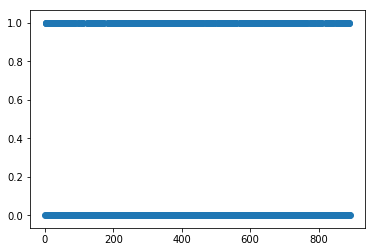

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df['PassengerId'], df['Survived'])

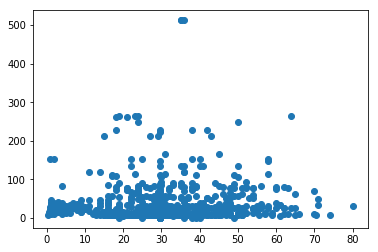

In [55]:
plt.scatter(df['Age'], df['Fare'])
#plt.set_xlabel('Age')
#plt.set_ylabel('Fare')

Graph of Age of Passenger vs Fare the passenger had to pay

Text(0.5, 1.0, 'Survivor Count')

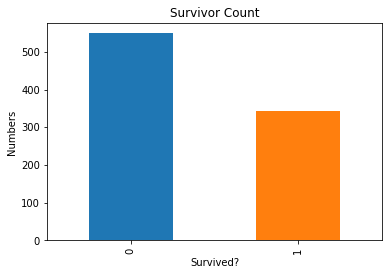

In [59]:
ax = df['Survived'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Survived?')
ax.set_ylabel('Numbers')
ax.set_title('Survivor Count')

Graphs Survivor Count as a bar chart

Text(0, 0.5, 'Age')

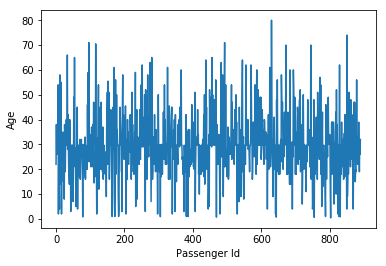

In [63]:
gr2 = df['Age'].plot()
gr2.set_xlabel('Passenger Id')
gr2.set_ylabel('Age')

Graphs Time Series like graph of Passenger Age

Text(0.5, 1.0, 'Gender Ratio Count')

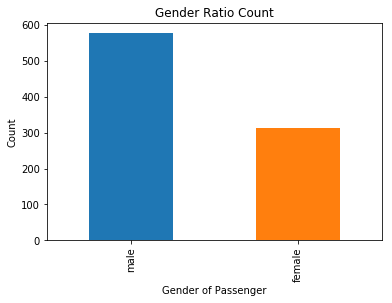

In [65]:
ax2 = df['Sex'].value_counts().plot(kind = 'bar')
ax2.set_xlabel('Gender of Passenger')
ax2.set_ylabel('Count')
ax2.set_title('Gender Ratio Count')

Graph to understand the Gender Ratio of the Titanic

Text(0.5, 1.0, 'Passenger Class Visual')

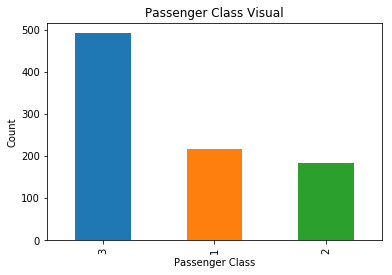

In [66]:
ax3 = df['Pclass'].value_counts().plot(kind = 'bar')
ax3.set_xlabel('Passenger Class')
ax3.set_ylabel('Count')
ax3.set_title('Passenger Class Visual')

Graph to understand the Class Ratio of the Titanic

**End of Question (ii)**

**Question (iii)**


---

Model a Classifier to predict survival using:


> (i) Decision Tree Classifier

>(ii) Naive Bayesian Classifier



In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import important sklearn packages needed

In [70]:
#do classification

X_train, X_test, y_train, y_test = train_test_split(df['Age'].values.reshape(-1,1), df['Survived'])

#X - data, y - class

DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

score = DTC.score(X_test, y_test)

print("score calculated from api call : " , score)

predict = DTC.predict(X_test)

score calculated from api call :  0.6233183856502242


In [71]:
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

Class Prediction on testing data

In [73]:
df[['Sex', 'Age', 'Fare']].values

array([['male', 22.0, 7.25],
       ['female', 38.0, 71.2833],
       ['female', 26.0, 7.925],
       ...,
       ['female', 29.69911764705882, 23.45],
       ['male', 26.0, 30.0],
       ['male', 32.0, 7.75]], dtype=object)

In [0]:
gender_conv = {'male': 1,'female': 0}
Gen_array = [gender_conv[i] for i in df['Sex']]
df['Gender'] = Gen_array

Generate a new Column for converting Sex to binary (Male or female) for use in classification

In [80]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['Gender', 'Age', 'Fare']].values, df['Survived'])

#X - data, y - class

DTC1 = DecisionTreeClassifier()

DTC1.fit(X_train1, y_train1)

score1 = DTC1.score(X_test1, y_test1)

print("score of Decision Tree Classifier : " , score1)

predict1 = DTC1.predict(X_test1)

export_graphviz(DTC1, out_file = "Decision_tree.dot")

score calculated from api call :  0.7533632286995515


*Decision Tree Classifier* : Score = ~75%

Classify survivors based on Gender, Age and Fare together

In [83]:
!ls
from google.colab import files
files.download('Decision_tree.dot') 

Decision_tree.dot  sample_data


>**end of classifier (i)**

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train1, y_train1).predict(X_test1)
print("Number of mislabeled points out of a total %d points : %d"
      % (y_test1.shape[0],(y_test1 != y_pred).sum()))
bayes_score = gnb.score(X_test1, y_test1)
print("Score of classifier = ", bayes_score)

Number of mislabeled points out of a total 223 points : 48
Score of classifier =  0.7847533632286996


*Naive Bayes Classifier* : Score = ~78%

>**End of Classifier (ii)**

**End of Question (iii)**